# DATA PREPARATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
 ##Download, load , visualise, normalise

In [6]:
X = pd.read_csv("Linear_X_Train.csv")
y = pd.read_csv("Linear_Y_Train.csv")

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_22120\3402035221.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


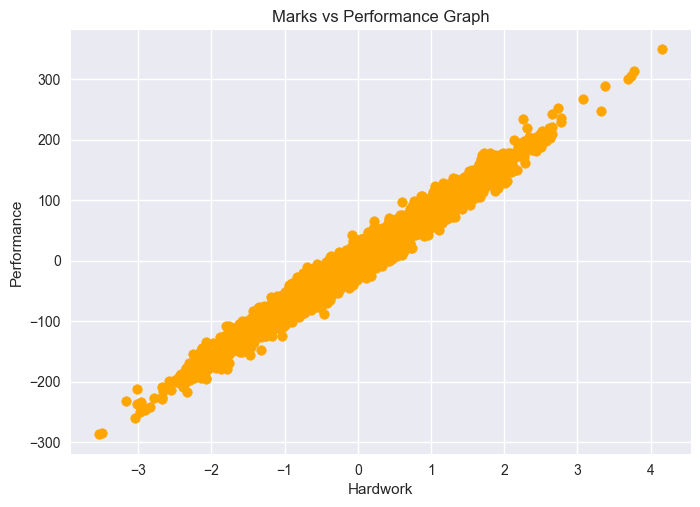

In [12]:
plt.style.use('seaborn')
plt.scatter(X,y, color = "orange")
plt.title("Marks vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [9]:
X = X.values
y = y.values

In [10]:
u = X.mean()
std = X.std()
X = (X - u)/ std